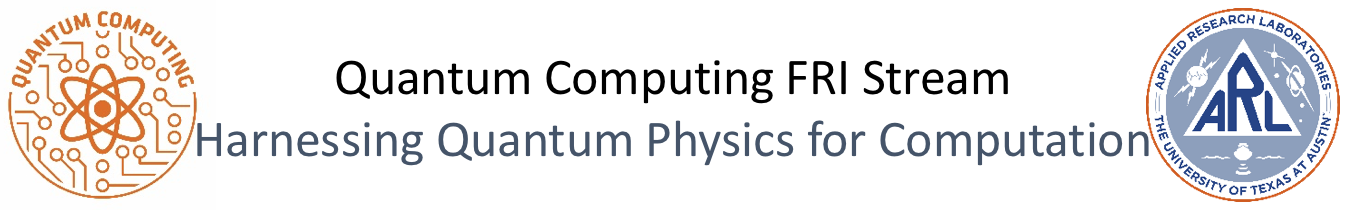

# Bernstein-Vazirani and Simon's Problem
## Lesson 7

### Installations and Imports

In [14]:
%pip install qiskit
%pip install qiskit-aer

#You may need to restart the runtime for this change to take effect
%pip install pylatexenc
%pip install qiskit_ibm_runtime

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import Aer
from qiskit.primitives import Sampler, StatevectorSampler, Estimator, StatevectorEstimator
import numpy as np

sampler = StatevectorSampler()
from qiskit.visualization import plot_histogram
from qiskit_ibm_runtime import SamplerV2 as Sampler

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Today's Objectives



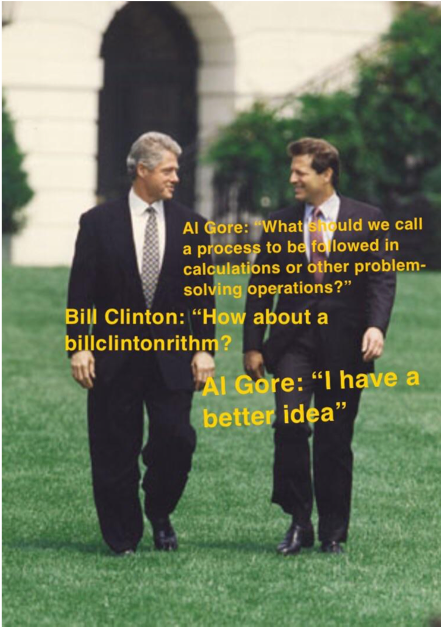

- Build on our last lesson by introducing new computational problems
- Solve the Bernstein-Vazirani Problem with a quantum algorithm
- Solve an instance of Simon's Problem with a quantum algorithm

## The Bernstein-Vazirani Problem

$\text{Let }a\text{ be an unknown, }n\text{-bit integer that characterizes the function }f\text{ such that}$

$$f(x) = a\odot x = a_{n-1}x_{n-1}\oplus \cdots \oplus a_{1}x_{1}\oplus a_{0}x_{0} \in \{0,1\}$$

$\text{For example, take }a\text{ and }x\text{ to be }2\text{-bit integers with }a=11\text{ and }x=11.$
$$f(x)=a_1 \cdot x_1 + a_0 \cdot x_0 =1\cdot 1 + 1\cdot 1=0$$

$\text{The problem is to find }a\text{ and characterize our function }f$

### <font color=green>Exercise</font>

$\text{For }n=4\text{ and some unknown }a=a_3a_2a_1a_0\text{ how many times must we evaluate }f(x)\text{ to find }a?$

$\text{Hint: This is akin to asking how many different values of }x\text{ we must plug in.}$

$\text{Give a strategy (a description, implementation, or pseudo-code suffices) for using }f(x)\text{ to solve for a.}$

### <font color=orange> Answer </font>

$$f(2^{0})=f([0001])=a_{0}$$
$$f(2^{1})=f([0010])=a_{1}$$
$$f(2^{2})=f([0100])=a_{2}$$
$$f(2^{3})=f([1000])=a_{3}$$

$\text{A classical algorithm must evaluate }f\text{ at least }n\text{ times. Here }n=4$

### A Quantum Solution

$\text{We need some }\mathbf{U}_{f}\text{ to implement our function such that }$

$$\mathbf{U}_{f}|x_{n-1}\cdots x_{1}x_{0}\rangle|y\rangle=|x_{n-1}\cdots x_{1}x_{0}\rangle|y\oplus f(x)\rangle$$

#### Steps:

$\text{1) Define }\mathbf{U}_{f}$

$2)\text{ Apply the }``\text{Deutsch" algorithm}$

$3)\text{ Input register = }a$

### <font color=green>Exercise</font>

The provided unitary implements a function with a 4-bit characteristic bitstring $a$.

Use the Berstein-Vazirani algorithm to find the characteristic bitstring.

In [15]:
#Define the Unitary
U = QuantumCircuit(5)
U.cx(1,0)
U.i(0)
U.cx(3,0)
U.cx(4,0)
U.draw('mpl')

AttributeError: 'QuantumCircuit' object has no attribute 'i'

In [5]:
#Initialize a quantum circuit with n+1=5 qubits and n=4 classical bits
qc =

#Deutsch's algorithm
##Not the output qubit

qc.barrier()

##Hadamard all the qubits

qc.barrier()

##Apply the unitary
###qc.compose(U,qubits=[0,1,2,3,4],inplace=True)

qc.barrier()

##Hadamard all the qubits again


#Measure the input register (not qubit 0)


qc.draw('mpl')

SyntaxError: ignored

In [ ]:
#Run the experiment! Interpret the outcome.
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1024)
result = job.result()
counts=result.get_counts(qc)
print(counts)
plot_histogram(counts)

### <font color=orange>Answer</font>

The provided unitary implements a function with a 4-bit characteristic bitstring $a$.

Use the Berstein-Vazirani algorithm to find the characteristic bitstring.

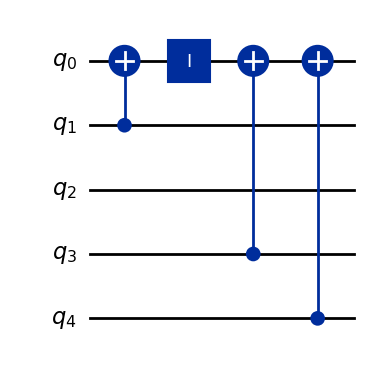

In [7]:
#Define a Unitary with a=1101
U = QuantumCircuit(5)
U.cx(1,0)
U.id(0)
U.cx(3,0)
U.cx(4,0)
U.draw('mpl')

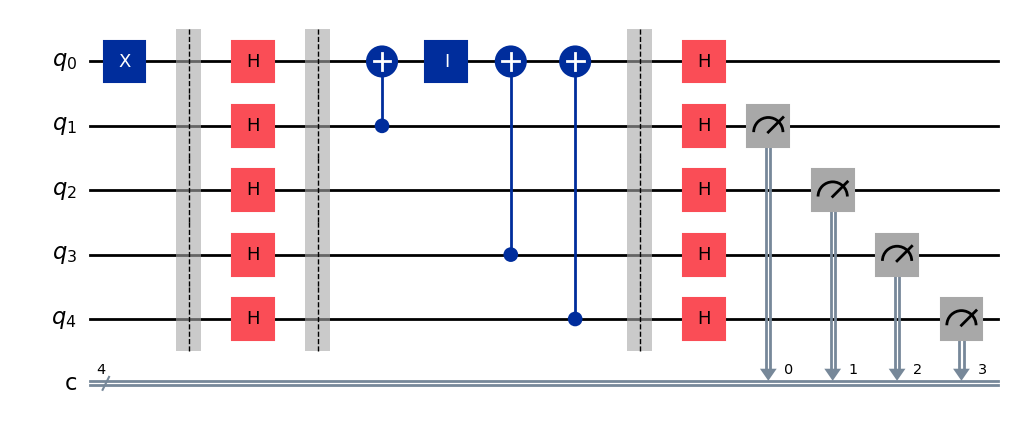

In [12]:
#Initialize a quantum circuit with n+1=5 qubits and n=4 classical bits
qc = QuantumCircuit(5,4)

#Deutsch's algorithm
##Not the output qubit
qc.x(0)

qc.barrier()

##Hadamard all the qubits
qc.h([0,1,2,3,4])

qc.barrier()

##Apply the unitary
qc.compose(U,qubits=[0,1,2,3,4],inplace=True)

qc.barrier()

##Hadamard all the qubits again
qc.h([0,1,2,3,4])

#Measure the input register (not qubit 0)
for i in range(1,5):
  qc.measure(i,i-1)

qc.draw('mpl')

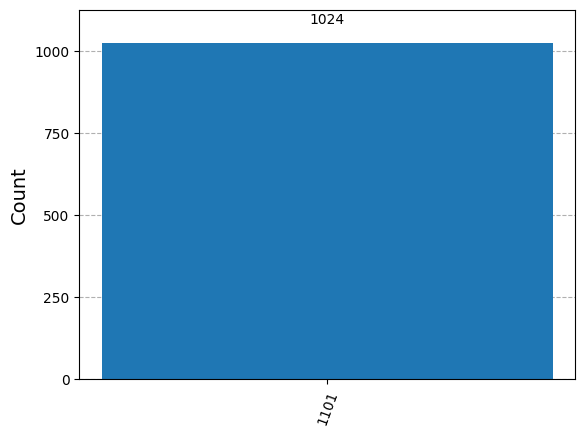

In [13]:
#Run the experiment! Interpret the outcome.
backend = Aer.get_backend('qasm_simulator') #tell it where to simulate

job = transpile(qc, backend)
results = sampler.run([qc]).result()
data_pub = results[0].data
counts = data_pub.c.get_counts()

#counts=execute(qc, backend, shots=1024).result().get_counts(qc)

plot_histogram(counts)

$$\text{We only evaluated }\mathbf{U}_{f}\text{ once!}$$

### Proof in Pictures - Don't spoil it for yourself until after you've tried the exercise!

Start with your Bernstein-Vazirani circuit

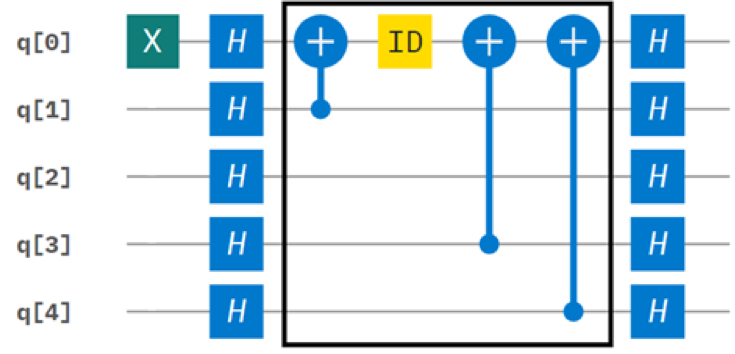

Because **H** is it's own inverse, we can insert a pair of **H** gates on each qubit between each of the **CNOT**s making up our unitary.

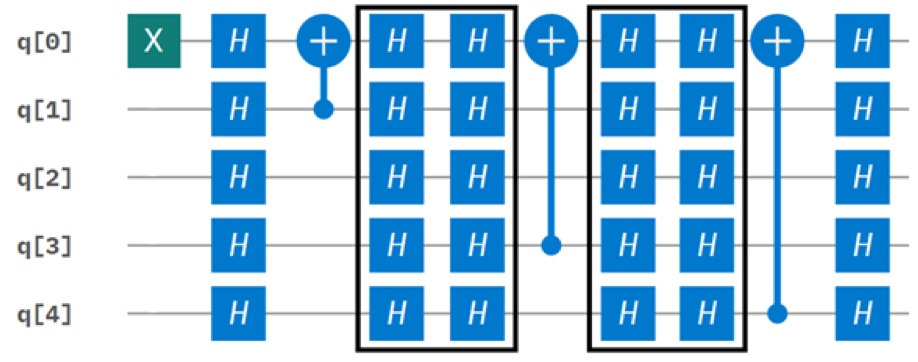

Group **CNOT**s with their surrounding **H**s and then cancel out the rest.

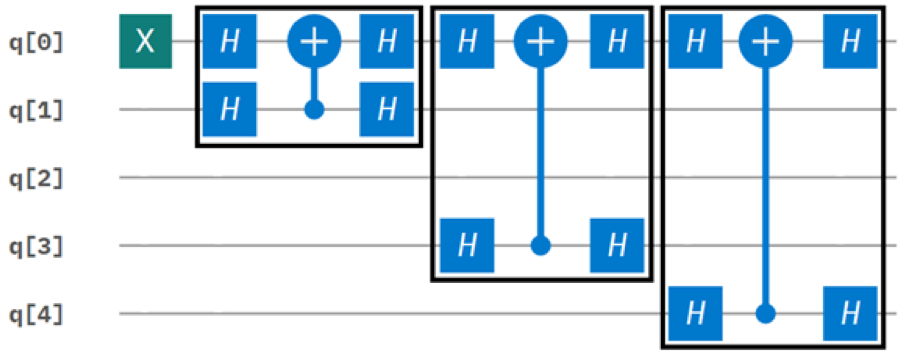

Use the identities **HXH**=**Z** and **HZH**=**X** to simplify the circuit.

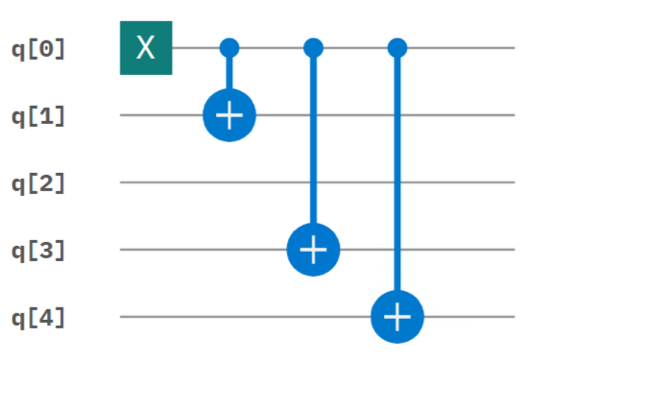

## Simon's Problem

$\text{Let }a\text{ be an unknown, positive, }n\text{-bit integer that characterizes the function }f\text{ such that for }x' \neq x,$

$$f(x') = f(x) \iff x' = x\oplus a$$


$\text{How many times must we evaluate }f\text{ to determine }a?$

### Classical algorithm

$\text{for }x=0...2^{n}-1$

$\quad\text{if }f(x)=f(x')\text{ for some }x'\lt x,\text{break}$

$a = x\oplus x'$

$\color{blue} {f(x')=f(x) \text{ means }x'=x\oplus a,\text{ which implies that }x\oplus x'=x\oplus x \oplus a = a}$

On average this method takes on the order of __N__ function calls, which scales __exponentially__ with n.

### Super Simple Example: n=1

$\text{To define our problem }a\text{ can only be }1\text{, because it must be a positive, }1\text{-bit integer.}$


$\text{Take two different inputs, }x=0 \text{ and }x'=1.$

$\text{Since }f(0)=f(1)\text{ [by the definition of the problem}],\text{ we have }a=x\oplus x'=1.$

#### Aside

$\text{Looking back to Deutsch's problem, }f\text{ is a constant function where the output is the same regardless of input.}$

<table>
<tr>
 <td>
<font size=6>$\mathbf{U}_{f_{00}}=$
</td>
<td>
<font size=6>$\mathbf{I}_{1}\otimes \mathbf{I}_{0}$
</tr>
<tr>
 <td>
 <font size=4>$x$
 </td>
 <td>
 <font size=4>$f(x)$
 </td>
</tr>
<tr>
 <td>
 <font size=4>$0$
 </td>
 <td>
 <font size=4>$0$
 </td></td><td>
</tr>
<tr>
 <td>
 <font size=4>$1$
 </td>
 <td>
 <font size=4>$0$
 </td>
</tr>
</table>

<table>
<tr>
 <td>
<font size=6>$\mathbf{U}_{f_{01}}=$
</td>
<td>
<font size=6>$\mathbf{I}_{1}\otimes \mathbf{X}_{0}$
</tr>
<tr>
 <td>
 <font size=4>$x$
 </td>
 <td>
 <font size=4>$f(x)$
 </td>
</tr>
<tr>
 <td>
 <font size=4>$0$
 </td>
 <td>
 <font size=4>$1$
 </td></td><td>
</tr>
<tr>
 <td>
 <font size=4>$1$
 </td>
 <td>
 <font size=4>$1$
 </td>
</tr>

</table>

### Quantum Algorithm

$1)\text{ Start with two }n\text{-qubit registers in the all zero state }|0\dots 0\rangle|0\dots 0\rangle.$

$2)\text{ Apply Hadamard gates to the input (left) register.}$

$3)\text{ Apply the unitary }\mathbf{U}_{f}\text{ that implements }f.$

$4)\text{ Apply another set of Hadamard gates to the input register.}$

$5)\text{ Measure the input register.}$

$6)\text{ Use the (not obvious) fact that }a\odot x=0\text{ for each measured outcome }x\text{ to find }a.$

$\text{Remember }a\odot x = a_{n-1}x_{n-1}\oplus \cdots \oplus a_{1}x_{1}\oplus a_{0}x_{0}$

The number of function calls in this algorithm scales only __linearly__ with n.

### <font color=green>Exercise</font>

$\text{Apply the quantum algorithm for Simon's problem by hand for the case }f(0)=f(1)=1$

$\text{That is, work through (write out) the steps given above using }\mathbf{U}_{f_{01}}\text{ on a single input register and a single output register.}$

### <font color=orange> Answer </font>

$\text{Start with }|0\rangle|0\rangle$

$\text{Apply a Hadamard to the input register.}$

<font color=blue>$$\mathbf{H}_{1}|0\rangle|0\rangle=\left(\frac{|0\rangle+|1\rangle}{\sqrt{2}}\right)|0\rangle = \frac{1}{\sqrt{2}}\left[|0\rangle|0\rangle+|1\rangle|0\rangle\right]$$</font>

$\text{Apply the unitary }\mathbf{U}_{f}$

<font color=blue>$$\mathbf{U}_{f}\frac{1}{\sqrt{2}}\left[|0\rangle|0\rangle+|1\rangle|0\rangle\right]=\frac{1}{\sqrt{2}}\left[|0\rangle|1\rangle+|1\rangle|1\rangle\right]=\frac{1}{\sqrt{2}}\left[|0\rangle+|1\rangle\right]|1\rangle $$</font>

$\text{Apply a Hadamard to the input register again.}$

<font color=blue>$$ \mathbf{H}_{1}\frac{1}{\sqrt{2}}\left[|0\rangle+|1\rangle\right]|1\rangle=|0\rangle|1\rangle $$</font>

$\text{A measurement of the input register of this state will always yield }0.$

<font color=blue>$$x=0$$</font>

$\text{Find }a>0\text{ such that }a\odot 0=0.$

<font color=blue>$$ a=1 $$</font>

## Simon's Quantum Math or: The Not Obvious Reason for $a \odot x =0$

$$\text{Start with } |0\dots 0\rangle|0\dots 0\rangle$$

<font color=blue>$\text{Hadamard the input register. Note }N=2^{n}$</font>
$$ \mathbf{H}_{2n-1\dots n}|0\dots 0\rangle|0\dots 0\rangle = \frac{1}{\sqrt{N}}\sum_{x=0}^{N-1} |x\rangle |0\rangle $$

<font color=blue>$x\oplus a \text{ just shuffles the terms, so the sums are identical}$</font>
$$= \frac{1}{2}\left[\frac{1}{\sqrt{N}}\sum_{x=0}^{N-1} |x\rangle |0\rangle + \frac{1}{\sqrt{N}}\sum_{x=0}^{N-1} |x\oplus a\rangle |0\rangle \right]$$

<font color=blue>$\text{Apply }\mathbf{U}_{f}$</font>
$$\xrightarrow{\mathbf{U}_{f}} \frac{1}{2\sqrt{N}}\sum_{x=0}^{N-1}\left[|x\rangle|f(x)\rangle+|x\oplus a\rangle|f(x\oplus a)\rangle\right]$$

<font color=blue>$\text{because }f(x\oplus a)=f(x)$</font>
$$=\frac{1}{2\sqrt{N}}\sum_{x=0}^{N-1}\left[|x\rangle+|x\oplus a\rangle\right]|f(x)\rangle$$

<font color=blue>$\text{Hadamard the input register again}$</font>
$$\xrightarrow{\mathbf{H}_{2n-1\dots n}} \frac{1}{2\sqrt{N}}\sum_{x=0}^{N-1}\left[\mathbf{H}_{2n-1\dots n}|x\rangle+\mathbf{H}_{2n-1\dots n}|x\oplus a\rangle\right]|f(x)\rangle$$

<font color=blue>$\text{*More on this step below.}$</font>
$$=\frac{1}{2N}\sum_{x=0}^{N-1}\left[\sum_{x'=0}^{N-1}(-1)^{x\odot x'}|x'\rangle+\sum_{x'=0}^{N-1}(-1)^{(x\oplus a)\odot x'}|x'\rangle\right]|f(x)\rangle$$

<font color=blue>$\text{Group terms and factor. }\\(-1)^{(x\oplus a)\odot x'}=(-1)^{(x\odot x')\oplus (a\odot x')}=(-1)^{x\odot x'}(-1)^{a\odot x'}$</font>
$$=\frac{1}{2N}\sum_{x=0}^{N-1}\sum_{x'=0}^{N-1}(-1)^{x\odot x'}\left[1+(-1)^{a\odot x'}\right]|x'\rangle|f(x)\rangle$$

<font color=blue> $1+(-1)^{a\odot x'} = 0 \quad \text{ for }a\odot x' = 1 \\ 1+(-1)^{a\odot x'} = 2 \quad \text{ for }a\odot x' = 0 $ </font>

Putting it all together:

$$|0\dots 0\rangle|0\dots 0\rangle \xrightarrow{\text{Simon's Algorithm}} \frac{1}{2N}\sum_{x=0}^{N-1}\sum_{x'=0}^{N-1}(-1)^{x\odot x'}\left[1+(-1)^{a\odot x'}\right]|x'\rangle|f(x)\rangle$$

$\text{So, if we measure }x'\text{ on the input register, it must be true that }a\odot x'=0$

#### <font color=blue>$\text{*More on that second Hadamard step.}$</font>

$$\text{We want to show that }\quad \mathbf{H}_{2n-1\dots n}|x\rangle = \frac{1}{\sqrt{N}}\sum_{x'=0}^{N-1}(-1)^{x\odot x'}|x'\rangle$$

<font color=blue>$$\mathbf{H}_{2n-1\dots n}|x\rangle = \mathbf{H}|x_{n-1}\rangle\dots\mathbf{H}|x_{0}\rangle=\left(\frac{|0\rangle+(-1)^{x_{n-1}}|1\rangle}{\sqrt{2}}\right)\cdots\left(\frac{|0\rangle+(-1)^{x_{0}}|1\rangle}{\sqrt{2}}\right)$$</font>

<font color=blue>$$\begin{align}
=& \frac{1}{\sqrt{2^{n}}}\left( \sum_{x'_{n-1}=0}^{1} (-1)^{x_{n-1}x'_{n-1}}|x'_{n-1}\rangle\right)\dots \left( \sum_{x'_{0}=0}^{1} (-1)^{x_{0}x'_{0}}|x'_{0}\rangle\right) \\
=& \frac{1}{\sqrt{N}} \sum_{x'_{n-1}=0}^{1}\cdots\sum_{x'_{0}=0}^{1} (-1)^{x_{n-1}x'_{n-1}+\cdots +x_{0}x'_{0}}|x'_{n-1}\rangle\cdots|x'_{0}\rangle \\
=& \frac{1}{\sqrt{N}}\sum_{x'=0}^{N-1}(-1)^{x\odot x'}|x'\rangle
\end{align}$$</font>